In [30]:
#RESET

#Use this line in Anaconda Prompt to avoid getting the IOPub data error
#jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10



from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '510b2f28-9210-4af6-aced-adc51b7425e9',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

df= pd.json_normalize(data['data'])

{'status': {'timestamp': '2023-08-21T22:56:48.979Z', 'error_code': 0, 'error_message': None, 'elapsed': 22, 'credit_count': 1, 'notice': None, 'total_count': 9499}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 10392, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [38]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#pd.set_option('display.float_format', lambda x: '%.5f' % x) #set the visualization for float numbers

In [10]:
#RESET

#make the json more presentable
#df= pd.json_normalize(data['data'])

#create a timestamp column
# df['timestamp'] = pd.to_datetime('now')
# df

In [31]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd

def api_runner():
    
    #dataframe to be declared beforehand
    global df
    #Sandbox environment is included on the 
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
    'start':'1',
    'limit':'15',
    'convert':'USD'
    }
    headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': '510b2f28-9210-4af6-aced-adc51b7425e9',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
        #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
#     #Previous method of concatenating data frames
#     #make the json more presentable
#     df2= pd.json_normalize(data['data'])
#     #create a timestamp column
#     df2['timestamp'] = pd.Timestamp.now()
#     #add data to a panda function and return it anew  
#     #df = pd.concat([df,df2])

    df= pd.json_normalize(data['data'])
    #create a timestamp column with the correct timestamp
    df['timestamp'] = pd.Timestamp.now(pytz.timezone('Canada/Pacific'))
    #add data to a panda function and return it anew  
    df
    
    
    #check if the outputfile exists. If it doesn't it will create it and check for the header
    if not os.path.isfile(r'C:\Users\Artur\Desktop\Python_Projects\CryptoAPI.csv'):
        df.to_csv(r'C:\Users\Artur\Desktop\Python_Projects\CryptoAPI.csv', header = 'column_names')
    else:
        df.to_csv(r'C:\Users\Artur\Desktop\Python_Projects\CryptoAPI.csv', mode = 'a', header = False) # mode = a stands for append, header check is False so it doesn't append based on headers


In [32]:
import os
from time import time
from time import sleep
import pandas as pd
import pytz


#create the for loop to call API 
for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [33]:
result = pd.read_csv(r'C:\Users\Artur\Desktop\Python_Projects\CryptoAPI.csv')
result

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19464262.00000,19464262.00000,False,NaN,1,NaN,NaN,NaN,2023-08-21T22:55:00.000Z,26133.73925,13417211474.72836,49.77240,-0.22246,-0.29002,-11.17449,-12.33882,-12.68835,-3.95807,508673947842.76758,48.22870,548808524294.33002,NaN,2023-08-21T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:56:57.763001-07:00
1,1,1027,Ethereum,ETH,ethereum,7240,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,120215150.71990,120215150.71990,True,NaN,2,NaN,NaN,NaN,2023-08-21T22:55:00.000Z,1667.79634,5101976428.60828,24.30630,-0.28790,-0.93070,-9.57275,-11.49096,-10.95412,-10.03490,200494388470.36255,19.01480,200494388470.35999,NaN,2023-08-21T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:56:57.763001-07:00
2,2,825,Tether USDt,USDT,tether,59822,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,82846484080.77916,86684257831.18761,True,NaN,3,NaN,NaN,NaN,2023-08-21T22:55:00.000Z,0.99986,21438751947.87484,36.95220,-0.00020,-0.01286,0.07542,-0.03446,-0.03207,-0.02349,82835052130.30923,7.85380,86672296307.98000,NaN,2023-08-21T22:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-21 15:56:57.763001-07:00
3,3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,153851642.60453,153851642.60453,False,NaN,4,NaN,NaN,NaN,2023-08-21T22:55:00.000Z,211.00711,581299794.34686,95.91940,-0.19566,-2.77478,-12.21606,-12.78691,-12.39255,-32.71257,32463790324.87737,3.07880,32463790324.88000,NaN,2023-08-21T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:56:57.763001-07:00
4,4,52,XRP,XRP,xrp,1035,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,52841868447.00000,99988501123.00000,False,NaN,5,NaN,NaN,NaN,2023-08-21T22:55:00.000Z,0.52427,1446372491.17117,-1.70270,0.04044,-3.26949,-17.10087,-29.95082,5.64324,12.64070,27703221553.12001,2.62660,52426650244.03000,NaN,2023-08-21T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:56:57.763001-07:00
5,5,3408,USD Coin,USDC,usd-coin,13685,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,25988939756.94275,25988939756.94275,False,NaN,6,NaN,NaN,NaN,2023-08-21T22:55:00.000Z,1.00005,3078705682.38109,47.10850,0.00175,-0.00152,-0.00791,-0.00482,0.01371,0.00928,25990188608.08036,2.46450,25990188608.08000,NaN,2023-08-21T22:55:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-21 15:56:57.763001-07:00
6,6,2010,Cardano,ADA,cardano,893,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,35051802923.63900,36091964625.42500,False,NaN,7,NaN,NaN,NaN,2023-08-21T22:55:00.000Z,0.26384,181232176.46994,22.55230,-0.43827,-2.62944,-9.26982,-15.41455,-9.04513,-28.79651,9248200334.19901,0.87710,11872970299.01000,NaN,2023-08-21T22:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:56:57.763001-07:00
7,7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,140685906383.70520,140685906383.70520,True,NaN,8,NaN,NaN,NaN,2023-08-21T22:55:00.000Z,0.06248,277195784.06729,32.44350,-0.31111,-2.13305,-16.45881,-11.92089,-4.91208,-

In [67]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10392,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19464262.00000,19464262.00000,False,NaN,1,NaN,NaN,None,2023-08-21T22:56:00.000Z,26133.09431,13426655529.38364,49.88550,-0.23111,-0.28715,-11.16278,-12.33367,-12.74090,-3.93369,508661394447.36005,48.24570,548794980431.03998,None,2023-08-21T22:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:57:59.416981-07:00
1,1027,Ethereum,ETH,ethereum,7240,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120215150.71990,120215150.71990,True,NaN,2,NaN,NaN,None,2023-08-21T22:56:00.000Z,1667.62726,5105770042.30077,24.62020,-0.30565,-0.94002,-9.57416,-11.48471,-10.99407,-10.01905,200474062206.20486,19.01280,200474062206.20001,None,2023-08-21T22:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:57:59.416981-07:00
2,825,Tether USDt,USDT,tether,59822,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,82846484080.77916,86684257831.18761,True,NaN,3,NaN,NaN,None,2023-08-21T22:56:00.000Z,0.99983,21444913009.36749,37.04870,-0.00699,-0.00827,0.07421,-0.03859,-0.05844,-0.03988,82832734096.43852,7.85660,86669870893.70000,None,2023-08-21T22:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-08-21 15:57:59.416981-07:00
3,1839,BNB,BNB,bnb,1573,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,153851642.60453,153851642.60453,False,NaN,4,NaN,NaN,None,2023-08-21T22:56:00.000Z,211.01034,580621690.66763,95.78830,-0.18751,-2.77452,-12.20720,-12.78382,-12.37504,-32.71227,32464286984.11299,3.07890,32464286984.11000,None,2023-08-21T22:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:57:59.416981-07:00
4,52,XRP,XRP,xrp,1035,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,52841868447.00000,99988501123.00000,False,NaN,5,NaN,NaN,None,2023-08-21T22:56:00.000Z,0.52428,1446330394.45389,-1.70660,0.05167,-3.26639,-17.09149,-29.94811,5.66358,12.65825,27703990888.72353,2.62770,52428106164.55000,None,2023-08-21T22:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:57:59.416981-07:00
5,3408,USD Coin,USDC,usd-coin,13685,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,25988939756.94275,25988939756.94275,False,NaN,6,NaN,NaN,None,2023-08-21T22:56:00.000Z,1.00002,3077662690.95637,46.98930,-0.00662,0.00307,-0.00282,-0.00977,-0.00211,0.00307,25989578974.61781,2.46450,25989578974.62000,None,2023-08-21T22:56:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-08-21 15:57:59.416981-07:00
6,2010,Cardano,ADA,cardano,893,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35051802923.63900,36091964625.42500,False,NaN,7,NaN,NaN,None,2023-08-21T22:56:00.000Z,0.26385,181454345.71313,22.71600,-0.43670,-2.63251,-9.26810,-15.40445,-9.01954,-28.80121,9248259299.70216,0.87710,11873045999.75000,None,2023-08-21T22:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-08-21 15:57:59.416981-07:00
7,74,Dogecoin,DOGE,dogecoin,770,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,140685906383.70520,140685906383.70520,True,NaN,8,NaN,NaN,None,2023-08-21T22:56:00.000Z,0.06248,277378004.54436,32.53540,-0.31552,-2.14238,-16.45944,-11.91750,-4.90274,-14.22721,87

In [68]:
#group by and average

meandf= df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
meandf

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.23111,-0.28715,-11.16278,-12.33367,-12.74090,-3.93369
Ethereum,-0.30565,-0.94002,-9.57416,-11.48471,-10.99407,-10.01905
Tether USDt,-0.00699,-0.00827,0.07421,-0.03859,-0.05844,-0.03988
BNB,-0.18751,-2.77452,-12.20720,-12.78382,-12.37504,-32.71227
XRP,0.05167,-3.26639,-17.09149,-29.94811,5.66358,12.65825
USD Coin,-0.00662,0.00307,-0.00282,-0.00977,-0.00211,0.00307
Cardano,-0.43670,-2.63251,-9.26810,-15.40445,-9.01954,-28.80121
Dogecoin,-0.31552,-2.14238,-16.45944,-11.91750,-4.90274,-14.22721
Solana,-0.29288,-2.47866,-15.26194,-15.48400,27.90589,6.04643


In [40]:
#creating a series of data. For a different type of visualization

dfstack = meandf.stack()

dfstack

name                                     
Bitcoin      quote.USD.percent_change_1h     -0.23111
             quote.USD.percent_change_24h    -0.28715
             quote.USD.percent_change_7d    -11.16278
             quote.USD.percent_change_30d   -12.33367
             quote.USD.percent_change_60d   -12.74090
             quote.USD.percent_change_90d    -3.93369
Ethereum     quote.USD.percent_change_1h     -0.30565
             quote.USD.percent_change_24h    -0.94002
             quote.USD.percent_change_7d     -9.57416
             quote.USD.percent_change_30d   -11.48471
             quote.USD.percent_change_60d   -10.99407
             quote.USD.percent_change_90d   -10.01905
Tether USDt  quote.USD.percent_change_1h     -0.00699
             quote.USD.percent_change_24h    -0.00827
             quote.USD.percent_change_7d      0.07421
             quote.USD.percent_change_30d    -0.03859
             quote.USD.percent_change_60d    -0.05844
             quote.USD.percent_change_90

In [41]:
#changing it back to data frame and keeping the new column structure
convstack = dfstack.to_frame(name='values')
convstack

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.23111
            quote.USD.percent_change_24h  -0.28715
            quote.USD.percent_change_7d  -11.16278
            quote.USD.percent_change_30d -12.33367
            quote.USD.percent_change_60d -12.74090
            quote.USD.percent_change_90d  -3.93369
Ethereum    quote.USD.percent_change_1h   -0.30565
            quote.USD.percent_change_24h  -0.94002
            quote.USD.percent_change_7d   -9.57416
            quote.USD.percent_change_30d -11.48471
            quote.USD.percent_change_60d -10.99407
            quote.USD.percent_change_90d -10.01905
Tether USDt quote.USD.percent_change_1h   -0.00699
            quote.USD.percent_change_24h  -0.00827
            quote.USD.percent_change_7d    0.07421
            quote.USD.percent_change_30d  -0.03859
            quote.USD.percent_change_60d  -0.05844
            quote.USD.percent_change_90d  -0.03988
BNB         quote.USD.percent_change_1h   -0.18751
            quote.USD.percent_change_24h  -2.77452
            quote.USD.percent_change_7d  -12.20720
            quote.USD.percent_change_30d -12.78382
            quote.USD.percent_change_60d -12.37504
            quote.USD.percent_change_90d -32.71227
XRP         quote.USD.percent_change_1h    0.05167
            quote.USD.percent_change_24h  -3.26639
            quote.USD.percent_change_7d  -17.09149
            quote.USD.percent_change_30d -29.94811
            quote.USD.percent_change_60d   5.66358
            quote.USD.percent_change_90d  12.65825
USD Coin    quote.USD.percent_change_1h   -0.00662
            quote.USD.percent_change_24h   0.00307
            quote.USD.percent_change_7d   -0.00282
            quote.USD.percent_change_30d  -0.00977
            quote.USD.percent_change_60d  -0.00211
            quote.USD.percent_change_90d   0.00307
Cardano     quote.USD.percent_change_1h   -0.43670
            quote.USD.percent_change_24h  -2.63251
            quote.USD.percent_change_7d   -9.26810
            quote.USD.percent_change_30d -15.40445
            quote.USD.percent_change_60d  -9.01954
            quote.USD.percent_change_90d -28.80121
Dogecoin    quote.USD.percent_change_1h   -0.31552
            quote.USD.percent_change_24h  -2.14238
            quote.USD.percent_change_7d  -16.45944
            quote.USD.percent_change_30d -11.91750
            quote.USD.percent_change_60d  -4.90274
            quote.USD.percent_change_90d -14.22721
Solana      quote.USD.percent_change_1h   -0.29288
            quote.USD.percent_change_24h  -2.47866
            quote.USD.percent_change_7d  -15.26194
            quote.USD.percent_change_30d -15.48400
            quote.USD.percent_change_60d  27.90589
            quote.USD.percent_change_90d   6.04643
TRON        quote.USD.percent_change_1h   -0.05971
            quote.USD.percent_change_24h  -1.04938
            quote.USD.percent_change_7d   -2.87253
            quote.USD.percent_change_30d -11.39972
            quote.USD.percent_change_60d   4.86331
            quote.USD.percent_change_90d  -4.21867
Polkadot    quote.USD.percent_change_1h   -0.29160
            quote.USD.percent_change_24h  -1.49874
            quote.USD.percent_change_7d  -10.90732
            quote.USD.percent_change_30d -16.87531
            quote.USD.percent_change_60d  -7.93435
            quote.USD.percent_change_90d -17.58998
Dai         quote.USD.percent_change_1h   -0.04884
            quote.USD.percent_change_24h  -0.01460
            quote.USD.percent_change_7d   -0.04871
            quote.USD.percent_change_30d   0.00855
            quote.USD.percent_change_60d   0.08431
            quote.USD.percent_change_90d  -0.00910
Polygon     quote.USD.percent_change_1h   -0.58761
            quote.USD.percent_change_24h  -3.70651
            quote.USD.percent_change_7d  -17.72739
            quote.USD.percent_change_30d -26.26881
            quote.USD.percent_change_60d -15.33519
            quo

In [47]:
convstack

values
name                                              
Bitcoin     quote.USD.percent_change_1h   -0.23111
            quote.USD.percent_change_24h  -0.28715
            quote.USD.percent_change_7d  -11.16278
            quote.USD.percent_change_30d -12.33367
            quote.USD.percent_change_60d -12.74090
            quote.USD.percent_change_90d  -3.93369
Ethereum    quote.USD.percent_change_1h   -0.30565
            quote.USD.percent_change_24h  -0.94002
            quote.USD.percent_change_7d   -9.57416
            quote.USD.percent_change_30d -11.48471
            quote.USD.percent_change_60d -10.99407
            quote.USD.percent_change_90d -10.01905
Tether USDt quote.USD.percent_change_1h   -0.00699
            quote.USD.percent_change_24h  -0.00827
            quote.USD.percent_change_7d    0.07421
            quote.USD.percent_change_30d  -0.03859
            quote.USD.percent_change_60d  -0.05844
            quote.USD.percent_change_90d  -0.03988
BNB         quote.USD.percent_change_1h   -0.18751
            quote.USD.percent_change_24h  -2.77452
            quote.USD.percent_change_7d  -12.20720
            quote.USD.percent_change_30d -12.78382
            quote.USD.percent_change_60d -12.37504
            quote.USD.percent_change_90d -32.71227
XRP         quote.USD.percent_change_1h    0.05167
            quote.USD.percent_change_24h  -3.26639
            quote.USD.percent_change_7d  -17.09149
            quote.USD.percent_change_30d -29.94811
            quote.USD.percent_change_60d   5.66358
            quote.USD.percent_change_90d  12.65825
USD Coin    quote.USD.percent_change_1h   -0.00662
            quote.USD.percent_change_24h   0.00307
            quote.USD.percent_change_7d   -0.00282
            quote.USD.percent_change_30d  -0.00977
            quote.USD.percent_change_60d  -0.00211
            quote.USD.percent_change_90d   0.00307
Cardano     quote.USD.percent_change_1h   -0.43670
            quote.USD.percent_change_24h  -2.63251
            quote.USD.percent_change_7d   -9.26810
            quote.USD.percent_change_30d -15.40445
            quote.USD.percent_change_60d  -9.01954
            quote.USD.percent_change_90d -28.80121
Dogecoin    quote.USD.percent_change_1h   -0.31552
            quote.USD.percent_change_24h  -2.14238
            quote.USD.percent_change_7d  -16.45944
            quote.USD.percent_change_30d -11.91750
            quote.USD.percent_change_60d  -4.90274
            quote.USD.percent_change_90d -14.22721
Solana      quote.USD.percent_change_1h   -0.29288
            quote.USD.percent_change_24h  -2.47866
            quote.USD.percent_change_7d  -15.26194
            quote.USD.percent_change_30d -15.48400
            quote.USD.percent_change_60d  27.90589
            quote.USD.percent_change_90d   6.04643
TRON        quote.USD.percent_change_1h   -0.05971
            quote.USD.percent_change_24h  -1.04938
            quote.USD.percent_change_7d   -2.87253
            quote.USD.percent_change_30d -11.39972
            quote.USD.percent_change_60d   4.86331
            quote.USD.percent_change_90d  -4.21867
Polkadot    quote.USD.percent_change_1h   -0.29160
            quote.USD.percent_change_24h  -1.49874
            quote.USD.percent_change_7d  -10.90732
            quote.USD.percent_change_30d -16.87531
            quote.USD.percent_change_60d  -7.93435
            quote.USD.percent_change_90d -17.58998
Dai         quote.USD.percent_change_1h   -0.04884
            quote.USD.percent_change_24h  -0.01460
            quote.USD.percent_change_7d   -0.04871
            quote.USD.percent_change_30d   0.00855
            quote.USD.percent_change_60d   0.08431
            quote.USD.percent_change_90d  -0.00910
Polygon     quote.USD.percent_change_1h   -0.58761
            quote.USD.percent_change_24h  -3.70651
            quote.USD.percent_change_7d  -17.72739
            quote.USD.percent_change_30d -26.26881
            quote.USD.percent_change_60d -15.33519
            quo

In [42]:
#count the number of values to create an index
convstack.count()

values    90
dtype: int64

In [50]:
#to create an index first create an index with a range similar to the number of columns

index = pd.Index(range(90))

# indexdf = convstack.set_index(convstack['name']) #incorrect way of setting the names to index

#create a index inside the existing converted stack data frame
indexdf = convstack.set_index(index)
#reset the index to make the name column appear again
indexdf = convstack.reset_index()
indexdf

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.23111
1,Bitcoin,quote.USD.percent_change_24h,-0.28715
2,Bitcoin,quote.USD.percent_change_7d,-11.16278
3,Bitcoin,quote.USD.percent_change_30d,-12.33367
4,Bitcoin,quote.USD.percent_change_60d,-12.74090
5,Bitcoin,quote.USD.percent_change_90d,-3.93369
6,Ethereum,quote.USD.percent_change_1h,-0.30565
7,Ethereum,quote.USD.percent_change_24h,-0.94002
8,Ethereum,quote.USD.percent_change_7d,-9.57416
9,Ethereum,quote.USD.percent_change_30d,-11.48471


In [53]:
#rename the incorrect column
indexdf = indexdf.rename(columns={'level_1':'percent_change'})
indexdf

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.23111
1,Bitcoin,quote.USD.percent_change_24h,-0.28715
2,Bitcoin,quote.USD.percent_change_7d,-11.16278
3,Bitcoin,quote.USD.percent_change_30d,-12.33367
4,Bitcoin,quote.USD.percent_change_60d,-12.74090
5,Bitcoin,quote.USD.percent_change_90d,-3.93369
6,Ethereum,quote.USD.percent_change_1h,-0.30565
7,Ethereum,quote.USD.percent_change_24h,-0.94002
8,Ethereum,quote.USD.percent_change_7d,-9.57416
9,Ethereum,quote.USD.percent_change_30d,-11.48471


In [62]:
#replace the "quote.USD.percent_change" to something more readable
indexdf['percent_change'] = indexdf['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d','90d'])
indexdf

,name,percent_change,values
0,Bitcoin,1h,-0.23111
1,Bitcoin,24h,-0.28715
2,Bitcoin,7d,-11.16278
3,Bitcoin,30d,-12.33367
4,Bitcoin,60d,-12.74090
5,Bitcoin,90d,-3.93369
6,Ethereum,1h,-0.30565
7,Ethereum,24h,-0.94002
8,Ethereum,7d,-9.57416
9,Ethereum,30d,-11.48471


In [56]:
#creating visualizations
import seaborn as sns
import matplotlib.pyplot as plt

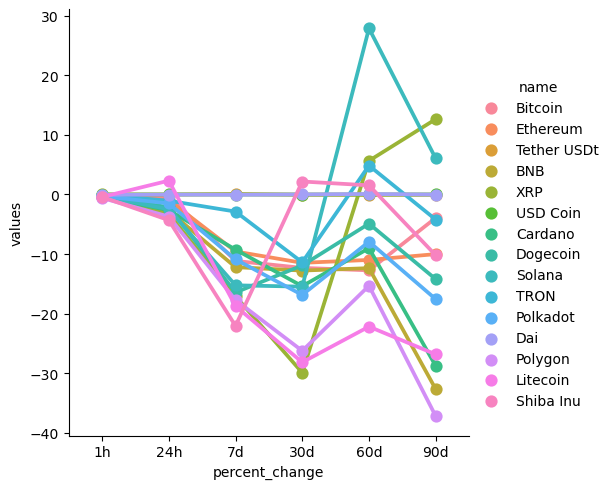

In [63]:
#creating a visualization with seaborn

sns.catplot(x='percent_change',y='values', hue='name', data=indexdf, kind='point')

In [66]:
#extracting a data specific columns and a specific coin (bitcoin)

btc_df = df[['name', 'quote.USD.price', 'timestamp']]
btc_df = btc_df.query("name == 'Bitcoin'")
btc_df


,name,quote.USD.price,timestamp
0,Bitcoin,26133.09431,2023-08-21 15:57:59.416981-07:00


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

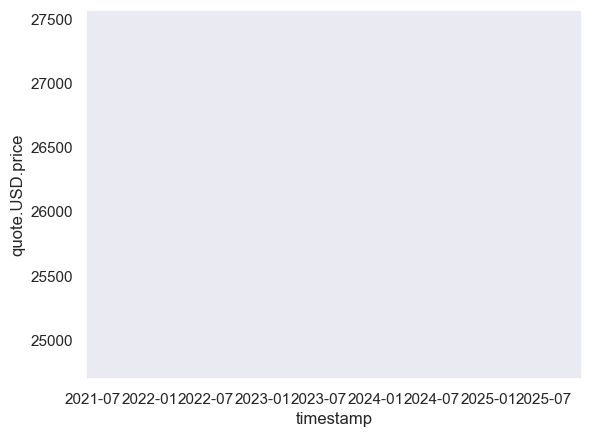

In [69]:
sns.set_theme(style='dark')

sns.lineplot(x='timestamp', y='quote.USD.price', data = btc_df)